# Machine learning project. Spam email classification

In this exercise, you will implement logistic regression and apply it to two different datasets. 


# Outline
- [ 1 - Packages and imports ](#1)
- [ 2 - Load the dataset](#2)



<a name="1"></a>
## 1 - Packages and imports 

First, let's run the cell below to import all the packages that you will need during this project.

In [ ]:
!pip install kaggle
!pip install seaborn
!pip install scikit-learn
!pip install imbalanced-learn
!pip install utils

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
## 1 - Imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import numpy as np

import copy
import math

%matplotlib inline
from sklearn.preprocessing import PowerTransformer, RobustScaler,MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score 
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.metrics import precision_recall_curve ,confusion_matrix,make_scorer,accuracy_score, precision_score, recall_score, f1_score,  classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import learning_curve
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

<a name="2"></a>
## 2 - Loading the dataset and initial analysis

In this section, we load the dataset to the environment and analyze the balance, missing values and feature correlation. After that, we will split the dataset for training and testing.

In [7]:
pd.set_option('display.max_columns',None)
data= pd.read_csv('spambase_csv.csv')

### 2.1 The overview of the dataset

In [8]:
print("Spam Email Dataset Overview:")
print("Number of examples (emails):", data.shape[0])
print("Number of features (attributes):", data.shape[1] - 1) 
print("\nFirst few rows of the dataset:")
data.head()

Spam Email Dataset Overview:
Number of examples (emails): 4601
Number of features (attributes): 57

First few rows of the dataset:


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### 2.2 The code below checks whether we miss some values or not.

In [9]:
print("\nChecking for missing values:")
print(data.isnull().sum())


Checking for missing values:
word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_

### 2.3 Balance of the dataset

In [10]:
class_distribution = data['class'].value_counts()
class_distribution_normalized = data['class'].value_counts(normalize=True)

print("\nClass Distribution in the Dataset:")
print(f"Number of Non-Spam Emails: {class_distribution[0]} ({class_distribution_normalized[0]:.2%})")
print(f"Number of Spam Emails: {class_distribution[1]} ({class_distribution_normalized[1]:.2%})")

is_balanced = (class_distribution_normalized[1] >= 0.4) and (class_distribution_normalized[0] >= 0.4)  # Adjust threshold as needed
balance_status = "Balanced" if is_balanced else "Imbalanced"
print(f"\nDataset Balance Status: {balance_status}") 
#need to handle imbalance later maybe SMOTE have to check evaluation matrix first


Class Distribution in the Dataset:
Number of Non-Spam Emails: 2788 (60.60%)
Number of Spam Emails: 1813 (39.40%)

Dataset Balance Status: Imbalanced


The dataset is imbalanced.

### 2.4 Correlation matrix

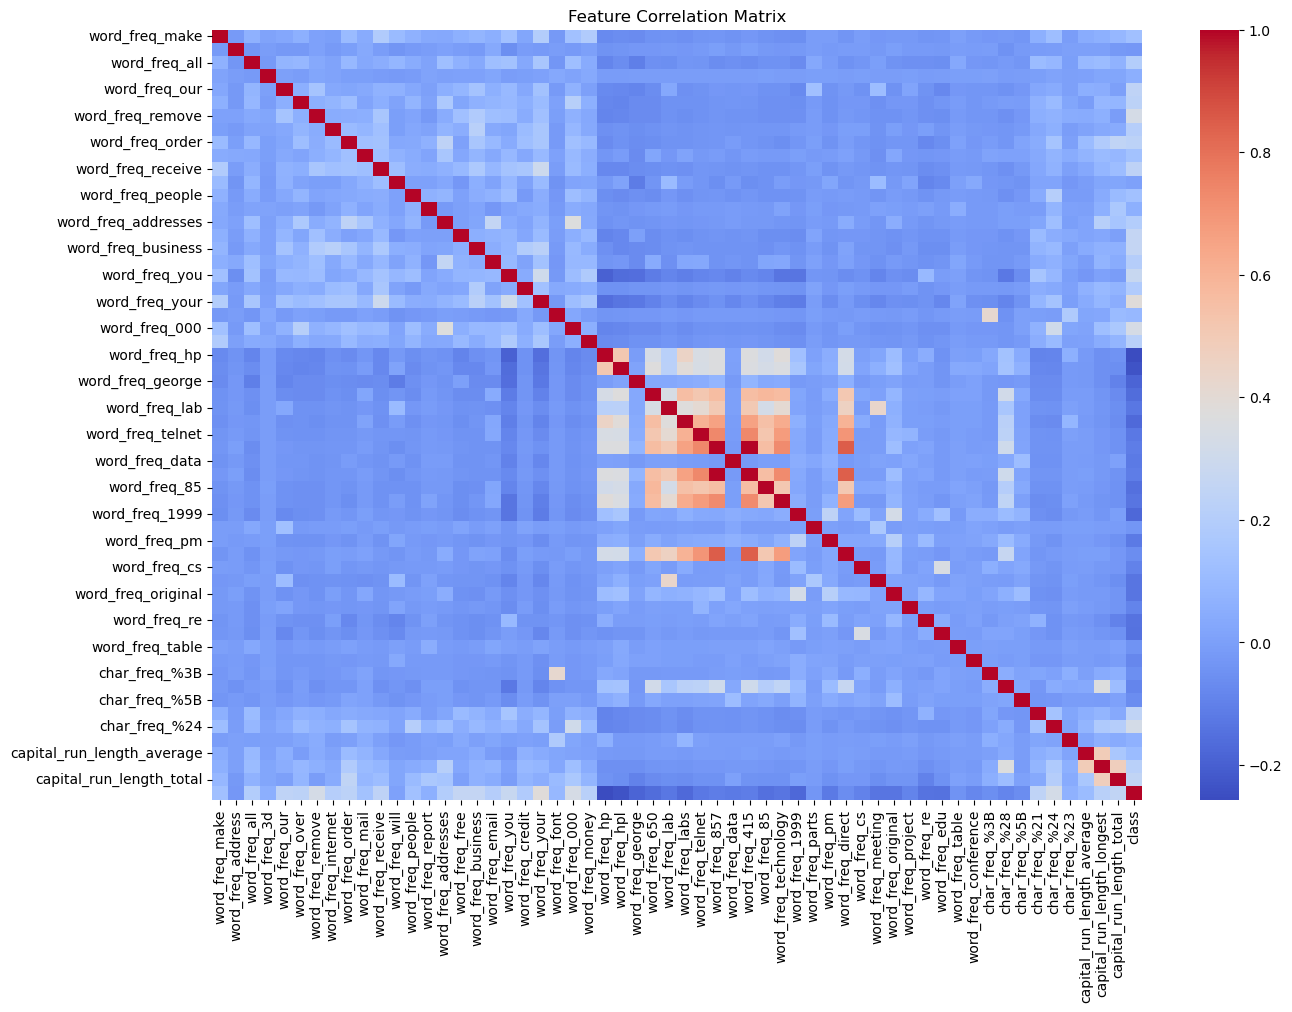


Correlation of features with the target (class 'class'):
class                         1.000000
word_freq_your                0.383234
word_freq_000                 0.334787
word_freq_remove              0.332117
char_freq_%24                 0.323629
word_freq_you                 0.273651
word_freq_free                0.263215
word_freq_business            0.263204
capital_run_length_total      0.249164
word_freq_our                 0.241920
char_freq_%21                 0.241888
word_freq_receive             0.234529
word_freq_over                0.232604
word_freq_order               0.231551
word_freq_money               0.216111
capital_run_length_longest    0.216097
word_freq_internet            0.206808
word_freq_email               0.204208
word_freq_all                 0.196988
word_freq_addresses           0.195902
word_freq_credit              0.189761
word_freq_mail                0.138962
word_freq_people              0.132927
word_freq_make                0.126208
capita

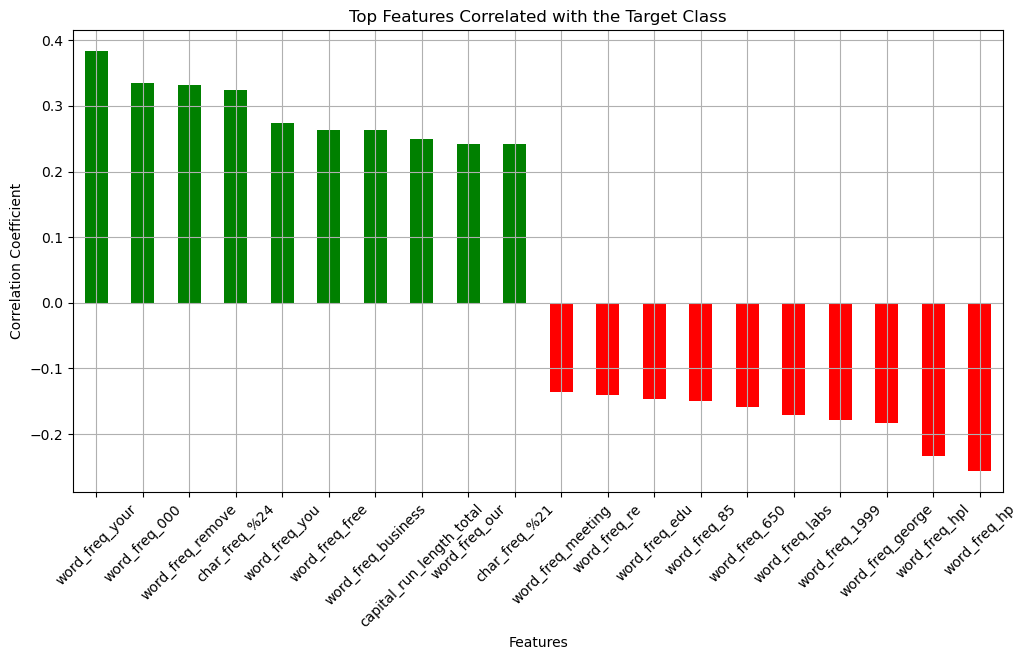

In [11]:
#6: Display correlation matrix
plt.figure(figsize=(15, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# Display correlation of features with the class 'class'
correlation_with_target = correlation_matrix['class'].sort_values(ascending=False)
print("\nCorrelation of features with the target (class 'class'):")
print(correlation_with_target)

# Select top 10 positively and negatively correlated features with 'class'
top_positive_corr = correlation_with_target.head(11)[1:]  # Excluding class
top_negative_corr = correlation_with_target.tail(10)

top_features = pd.concat([top_positive_corr, top_negative_corr])

# Plot the correlations
plt.figure(figsize=(12, 6))
top_features.plot(kind='bar', color=['green' if val > 0 else 'red' for val in top_features])
plt.title('Top Features Correlated with the Target Class')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
#plotting the correlation between features and class , will help selecting the right ffeatures to tune our model

### 2.5 Split the dataset

Now, we split the dataset for training and testing. We chose 70/30 ratio.

In [38]:
# 7: Split data into training and test sets (70% train, 30% test)

X = data.drop(columns=['class'])  # Features
y = data['class']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("\nData Splits:")
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Data Splits:
Training set size: (3220, 57)
Test set size: (1381, 57)


<a name="3"></a>
## 3 - Naive-Bayes model

In this section, we used Naive-Bayes model. We used 2 types of Naive-Bayes model which are Multinomial and Gaussian. Each models are trained using unbalanced and SMOTE balanced datasets.

In [53]:
##Common Functions 
def evaluate_model(y_test, y_pred, y_prob, title="Spam Detector Evaluation Metrics"):
    """
    Evaluate the model's performance using various metrics.
    
    Parameters:
    - y_test: Ground truth labels.
    - y_pred: Predicted labels from the model.
    - y_prob: Predicted probabilities from the model.
    - title: Title for the printed metrics.
    
    Returns:
    - A dictionary of evaluation metrics.
    """
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_prob)
    
    print(f"\n{title}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC Score: {auc_score:.4f}")
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc_score': auc_score
    }

def plot_confusion_matrix(y_test, y_pred, labels, title="Confusion Matrix"):
    """
    Plot the confusion matrix as a heatmap.
    
    Parameters:
    - y_test: Ground truth labels.
    - y_pred: Predicted labels from the model.
    - labels: List of labels for the confusion matrix axes (e.g., ['Non-Spam', 'Spam']).
    - title: Title for the confusion matrix plot.
    """
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

def print_classification_report(y_test, y_pred, title="Classification Report"):
    """
    Print the classification report.
    
    Parameters:
    - y_test: Ground truth labels.
    - y_pred: Predicted labels from the model.
    - title: Title for the classification report.
    """
    print(f"\n{title}")
    print(classification_report(y_test, y_pred))

def plot_roc_curve(y_test, y_prob, auc_score, title="ROC Curve"):
    """
    Plot the ROC curve.
    
    Parameters:
    - y_test: Ground truth labels.
    - y_prob: Predicted probabilities from the model.
    - auc_score: Pre-calculated AUC score.
    - title: Title for the ROC curve plot.
    """
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
    plt.title(title)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

### 3.1 Multinomial Naive-Bayes with unbalanced dataset

In [75]:
#  Train the Naive Bayes model : 
# we will use multinomial
spam_detector = MultinomialNB()
spam_detector.fit(X_train, y_train)
#prediction of the test set
y_pred = spam_detector.predict(X_test)
y_prob = spam_detector.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class


#### Results for Multinomial Naive-Bayes (unbalanced)

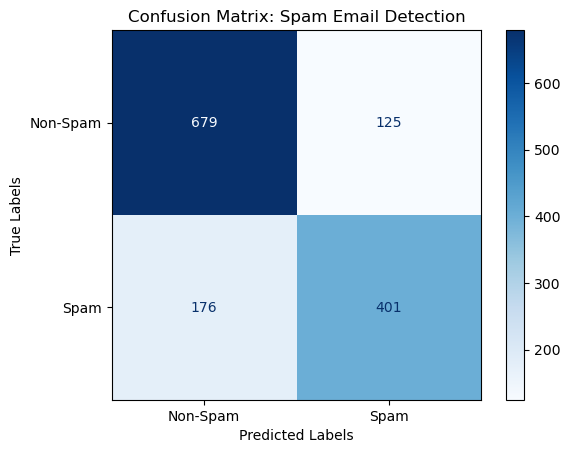


Detailed Classification Report
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       804
           1       0.76      0.69      0.73       577

    accuracy                           0.78      1381
   macro avg       0.78      0.77      0.77      1381
weighted avg       0.78      0.78      0.78      1381



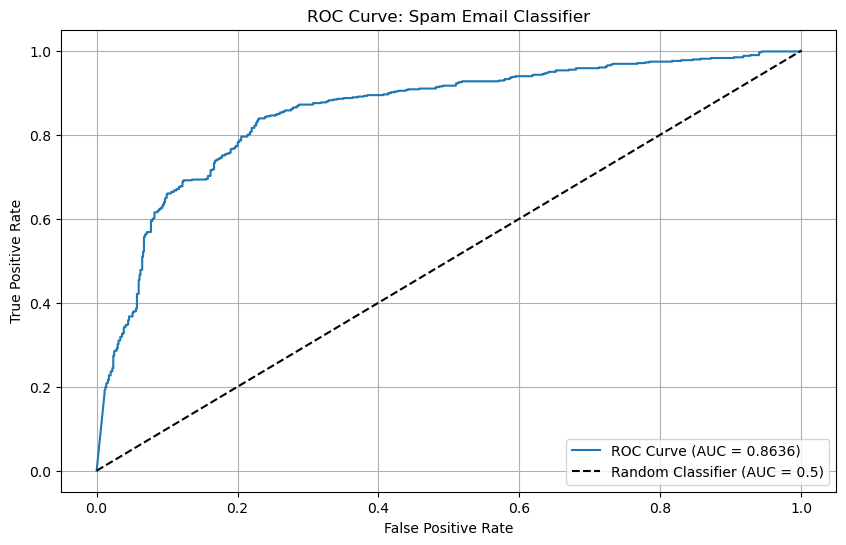

In [76]:
# Prediction of the test set
y_pred = spam_detector.predict(X_test)
y_prob = spam_detector.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Evaluation of the model using a confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Spam', 'Spam'])
disp.plot(cmap=plt.cm.Blues)

# Add titles and labels for clarity
plt.title("Confusion Matrix: Spam Email Detection")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Classification report
print_classification_report(y_test, y_pred, title="Detailed Classification Report")

# Plot the ROC curve
plot_roc_curve(y_test, y_prob, metrics['auc_score'], title="ROC Curve: Spam Email Classifier")


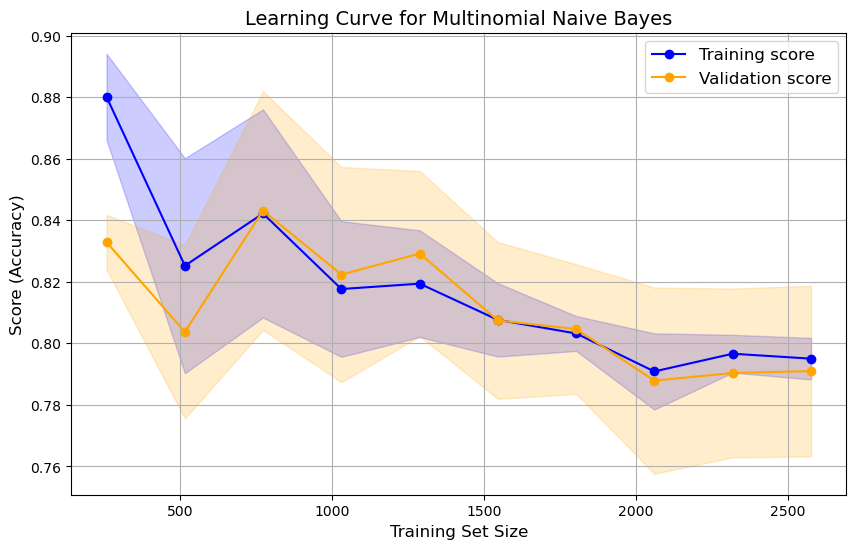

In [63]:
# Function to plot the learning curve
def plot_learning_curve(model, X, y, cv=5, scoring='accuracy'):
    """
    Plots the learning curve of a model.
    Parameters:
        - model: The machine learning model (classifier).
        - X: Feature dataset.
        - y: Target labels.
        - cv: Cross-validation splits (default=5).
        - scoring: Scoring metric for evaluation (default='accuracy').
    """
    # Generate the learning curve data
    train_sizes, train_scores, validation_scores = learning_curve(
        model, X, y, cv=cv, scoring=scoring, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )
    
    # Calculate mean and standard deviation of scores
    train_scores_mean = np.mean(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training score")
    plt.plot(train_sizes, validation_scores_mean, 'o-', color="orange", label="Validation score")
    plt.fill_between(train_sizes,
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     color="blue", alpha=0.2)
    plt.fill_between(train_sizes,
                     validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std,
                     color="orange", alpha=0.2)
    plt.title('Learning Curve for Multinomial Naive Bayes', fontsize=14)
    plt.xlabel('Training Set Size', fontsize=12)
    plt.ylabel('Score (Accuracy)', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

# Instantiate the MultinomialNB model
spam_detector = MultinomialNB()

# Plot the learning curve for Multinomial Naive Bayes using original data
plot_learning_curve(spam_detector, X_train, y_train, cv=5, scoring='accuracy')

### 3.2 Multinomial Naive-Bayes with SMOTE balanced dataset

In [43]:
# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nClass distribution after applying SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

# Pipeline: Resampling and hyperparameter tuning
pipeline = Pipeline([
    ('model', MultinomialNB())
])

# Hyperparameter grid for tuning
param_grid = {
    'model__alpha': [0.1, 0.5, 1.0, 1.5, 2.0]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=make_scorer(f1_score, average='weighted'),  # Weighted F1 score for optimization
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1
)

# Train the model using GridSearchCV
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters found
print("\nBest Parameters found by GridSearchCV:")
print(grid_search.best_params_)




Class distribution after applying SMOTE:
class
1    1984
0    1984
Name: count, dtype: int64
Fitting 5 folds for each of 5 candidates, totalling 25 fits

Best Parameters found by GridSearchCV:
{'model__alpha': 0.1}


#### Results for Multinomial Naive-Bayes (SMOTE balanced)


Improved Spam Detector Evaluation Metrics
Accuracy: 0.7878
Precision: 0.7582
Recall: 0.7227
F1 Score: 0.7400
AUC Score: 0.8636


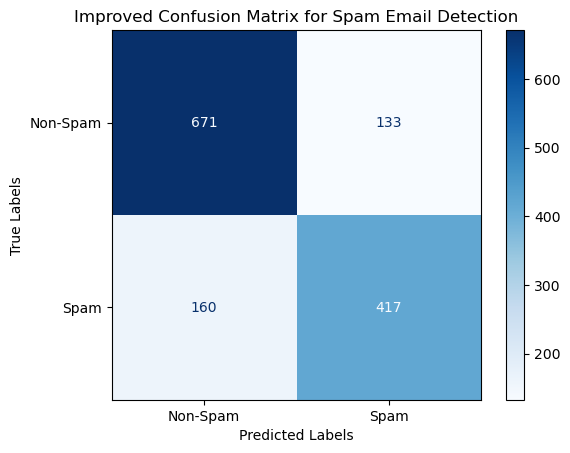


Improved Classification Report for Spam Email Detection
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       804
           1       0.76      0.72      0.74       577

    accuracy                           0.79      1381
   macro avg       0.78      0.78      0.78      1381
weighted avg       0.79      0.79      0.79      1381



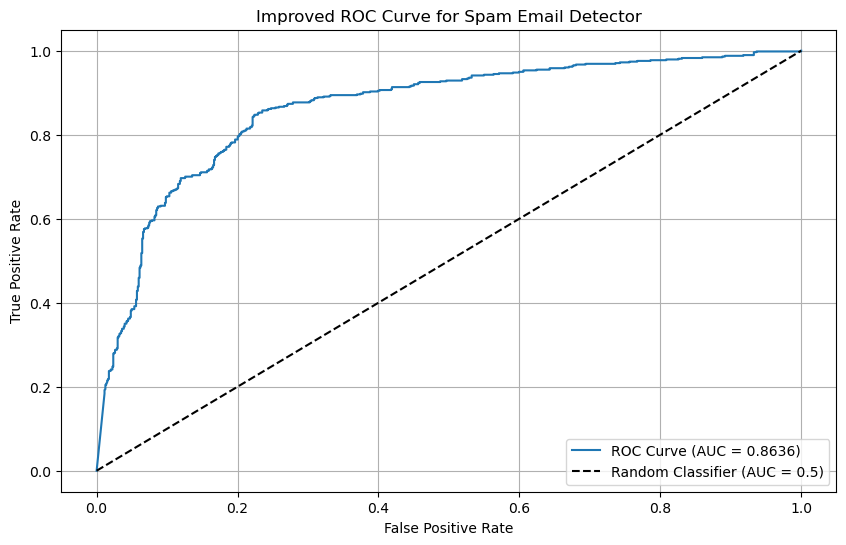

In [59]:
# Use the best model to make predictions and evaluate performance
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Evaluate the model using the refactored functions
metrics = evaluate_model(y_test, y_pred, y_prob, title="Improved Spam Detector Evaluation Metrics")

# Confusion matrix visualization using ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Spam', 'Spam'])
disp.plot(cmap=plt.cm.Blues)

# Add titles and labels for clarity
plt.title("Improved Confusion Matrix for Spam Email Detection")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Classification report
print_classification_report(y_test, y_pred, title="Improved Classification Report for Spam Email Detection")

# Plot the ROC curve
plot_roc_curve(y_test, y_prob, metrics['auc_score'], title="Improved ROC Curve for Spam Email Detector")

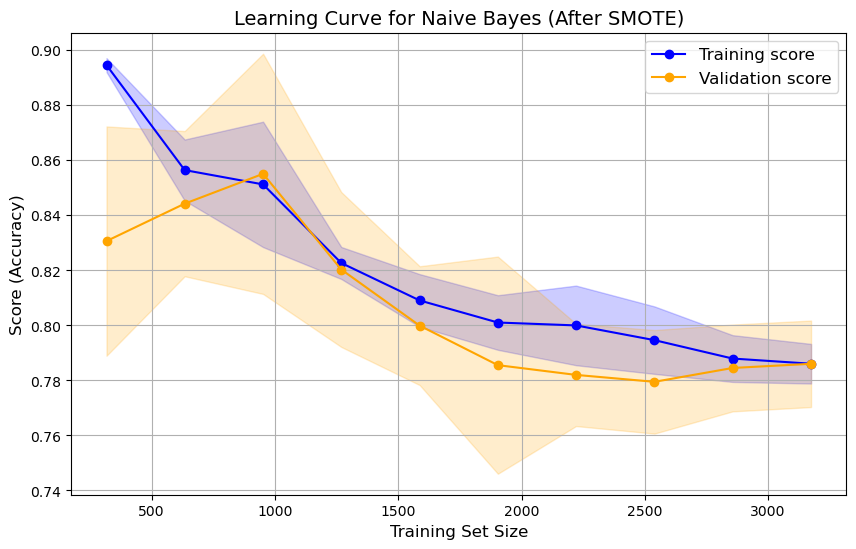

In [60]:
# Function to plot the learning curve
def plot_learning_curve(model, X, y, cv=5, scoring='accuracy'):
    """
    Plots the learning curve of a model.
    Parameters:
        - model: The machine learning model (classifier).
        - X: Feature dataset.
        - y: Target labels.
        - cv: Cross-validation splits (default=5).
        - scoring: Scoring metric for evaluation (default='accuracy').
    """
    # Generate the learning curve data
    train_sizes, train_scores, validation_scores = learning_curve(
        model, X, y, cv=cv, scoring=scoring, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )
    
    # Calculate mean and standard deviation of scores
    train_scores_mean = np.mean(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training score")
    plt.plot(train_sizes, validation_scores_mean, 'o-', color="orange", label="Validation score")
    plt.fill_between(train_sizes,
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     color="blue", alpha=0.2)
    plt.fill_between(train_sizes,
                     validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std,
                     color="orange", alpha=0.2)
    plt.title('Learning Curve for Naive Bayes (After SMOTE)', fontsize=14)
    plt.xlabel('Training Set Size', fontsize=12)
    plt.ylabel('Score (Accuracy)', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

# Plot the learning curve for the best Naive Bayes model using SMOTE-balanced data
plot_learning_curve(grid_search.best_estimator_, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

### 3.3 Gaussian Naive-Bayes with unbalanced dataset.

In [77]:
#Gaussian (better spam prediction, few FN) default model no tuning no skwed features
#trade off high recall
# Initialize the Gaussian Naive Bayes model
gnb_model = GaussianNB()

# Train the model
gnb_model.fit(X_train, y_train)

# Make predictions
y_pred_gnb = gnb_model.predict(X_test)
y_prob_gnb = gnb_model.predict_proba(X_test)[:, 1]  # Probability for the positive class (spam)

#Gaussian : recall critical trade off lot of false positive
#multinomial : higher precision :  missing some spam emails in exchange for fewer false positives. min false positive

#best choice Gaussian 


#### Results for Gaussian Naive-Bayes (unbalanced)


Gaussian Naive Bayes Evaluation Metrics
Accuracy: 0.8248
Precision: 0.7207
Recall: 0.9480
F1 Score: 0.8189
AUC Score: 0.9482


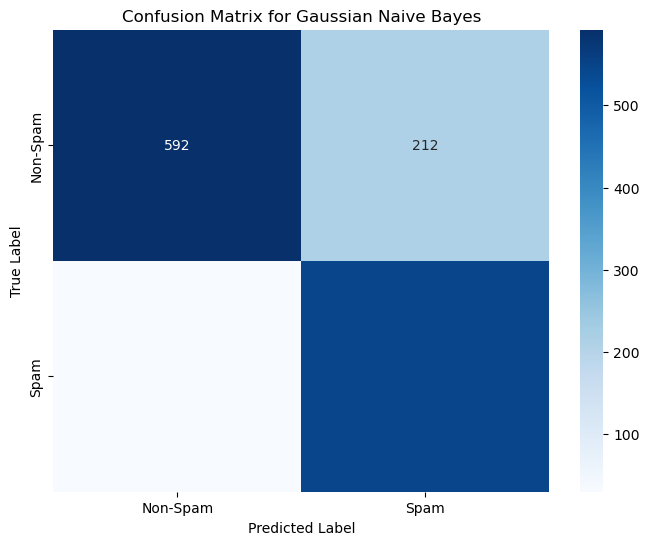


Classification Report for Gaussian Naive Bayes
              precision    recall  f1-score   support

           0       0.95      0.74      0.83       804
           1       0.72      0.95      0.82       577

    accuracy                           0.82      1381
   macro avg       0.84      0.84      0.82      1381
weighted avg       0.86      0.82      0.83      1381



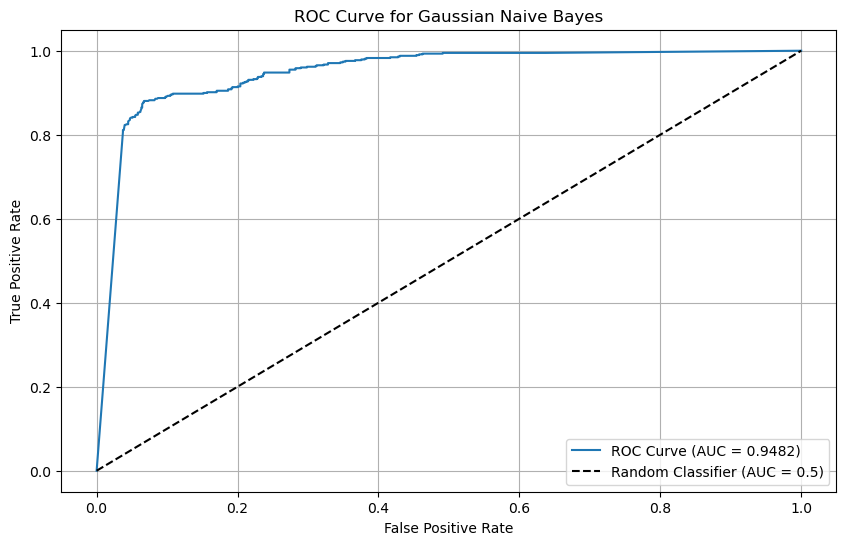

In [78]:
# Evaluate the model using the modular functions
metrics_gnb = evaluate_model(
    y_test, y_pred_gnb, y_prob_gnb,
    title="Gaussian Naive Bayes Evaluation Metrics"
)

# Visualize the confusion matrix
plot_confusion_matrix(
    y_test, y_pred_gnb, labels=['Non-Spam', 'Spam'],
    title="Confusion Matrix for Gaussian Naive Bayes"
)

# Print the classification report
print_classification_report(
    y_test, y_pred_gnb,
    title="Classification Report for Gaussian Naive Bayes"
)

# Plot the ROC curve
plot_roc_curve(
    y_test, y_prob_gnb, metrics_gnb['auc_score'],
    title="ROC Curve for Gaussian Naive Bayes"
)

### 3.4 Gaussian Naive-Bayes with SMOTE balanced dataset.

In [79]:
# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [80]:
#Gaussian (better spam prediction, few FN) default model no tuning no skwed features
#trade off high recall

print("\nClass distribution after applying SMOTE:")
print(pd.Series(y_train_resampled).value_counts())
# Initialize the Gaussian Naive Bayes model
gnb_model = GaussianNB()

# Train the model
gnb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_gnb = gnb_model.predict(X_test)
y_prob_gnb = gnb_model.predict_proba(X_test)[:, 1]  # Probability for the positive class (spam)

#Gaussian : recall critical trade off lot of false positive
#multinomial : higher precision :  missing some spam emails in exchange for fewer false positives. min false positive

#best choice Gaussian 



Class distribution after applying SMOTE:
class
1    1984
0    1984
Name: count, dtype: int64


#### Results for Gaussian Naive-Bayes (SMOTE balanced)


Gaussian Naive Bayes Evaluation Metrics
Accuracy: 0.8269
Precision: 0.7189
Recall: 0.9619
F1 Score: 0.8228
AUC Score: 0.9552


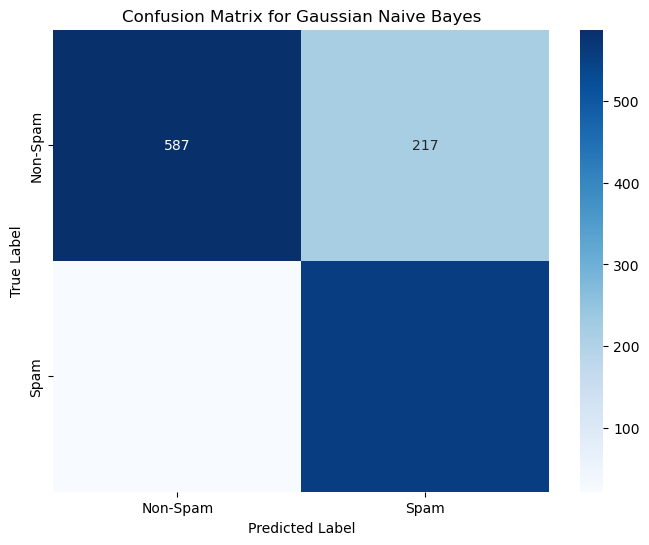


Classification Report for Gaussian Naive Bayes
              precision    recall  f1-score   support

           0       0.96      0.73      0.83       804
           1       0.72      0.96      0.82       577

    accuracy                           0.83      1381
   macro avg       0.84      0.85      0.83      1381
weighted avg       0.86      0.83      0.83      1381



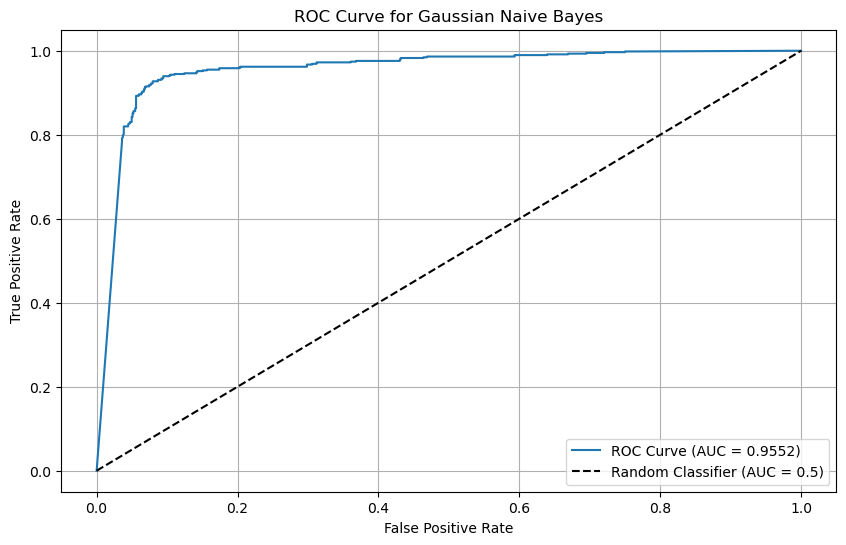

In [83]:
# Evaluate the model using the modular functions
metrics_gnb = evaluate_model(
    y_test, y_pred_gnb, y_prob_gnb,
    title="Gaussian Naive Bayes Evaluation Metrics"
)

# Visualize the confusion matrix
plot_confusion_matrix(
    y_test, y_pred_gnb, labels=['Non-Spam', 'Spam'],
    title="Confusion Matrix for Gaussian Naive Bayes"
)

# Print the classification report
print_classification_report(
    y_test, y_pred_gnb,
    title="Classification Report for Gaussian Naive Bayes"
)

# Plot the ROC curve
plot_roc_curve(
    y_test, y_prob_gnb, metrics_gnb['auc_score'],
    title="ROC Curve for Gaussian Naive Bayes"
)

### 3.5 Hyperparameter tuning


Tuned Gaussian Naive Bayes Evaluation Metrics
Accuracy: 0.8552
Precision: 0.7622
Recall: 0.9497
F1 Score: 0.8457
AUC Score: 0.9313


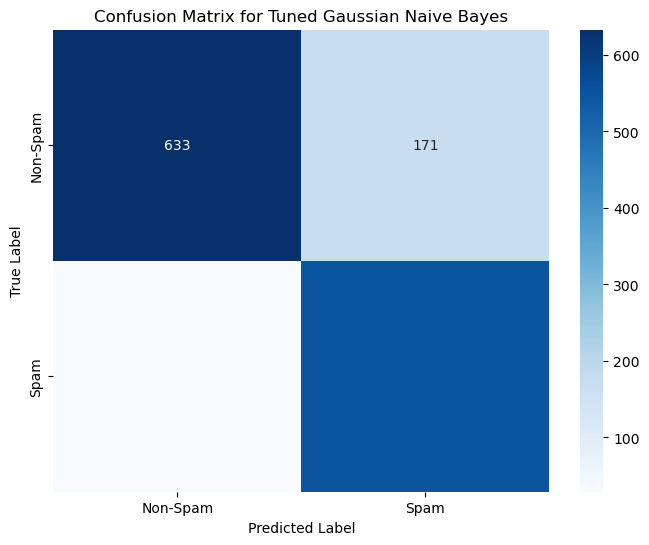


Classification Report for Tuned Gaussian Naive Bayes
              precision    recall  f1-score   support

           0       0.96      0.79      0.86       804
           1       0.76      0.95      0.85       577

    accuracy                           0.86      1381
   macro avg       0.86      0.87      0.85      1381
weighted avg       0.88      0.86      0.86      1381



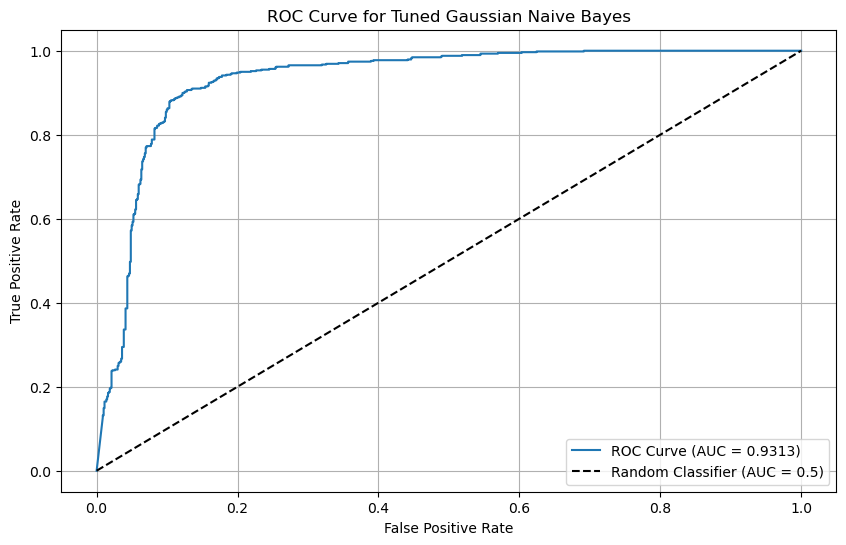


Best Parameters found by GridSearchCV for Gaussian Naive Bayes:
{'var_smoothing': 1e-06}


In [81]:
#Tuning Gaussian Naive Bayes :  var_smoothing. parameter
# Initialize the Gaussian Naive Bayes model
# Initialize the Gaussian Naive Bayes model
gnb_model = GaussianNB()

# Set up the parameter grid for tuning
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]  # Range of values for tuning
}

# Use GridSearchCV to find the best parameter
grid_search = GridSearchCV(gnb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Train the best model found by GridSearchCV
best_gnb_model = grid_search.best_estimator_

# Make predictions with the tuned model
y_pred_gnb = best_gnb_model.predict(X_test)
y_prob_gnb = best_gnb_model.predict_proba(X_test)[:, 1]

# Evaluate the model using the modular functions
metrics_gnb_tuned = evaluate_model(
    y_test, y_pred_gnb, y_prob_gnb,
    title="Tuned Gaussian Naive Bayes Evaluation Metrics"
)

# Visualize the confusion matrix
plot_confusion_matrix(
    y_test, y_pred_gnb, labels=['Non-Spam', 'Spam'],
    title="Confusion Matrix for Tuned Gaussian Naive Bayes"
)

# Print the classification report
print_classification_report(
    y_test, y_pred_gnb,
    title="Classification Report for Tuned Gaussian Naive Bayes"
)

# Plot the ROC curve
plot_roc_curve(
    y_test, y_prob_gnb, metrics_gnb_tuned['auc_score'],
    title="ROC Curve for Tuned Gaussian Naive Bayes"
)

# Display the best parameter found by GridSearchCV
print("\nBest Parameters found by GridSearchCV for Gaussian Naive Bayes:")
print(grid_search.best_params_)


Skewed Features:
 Index(['capital_run_length_longest', 'word_freq_parts', 'word_freq_3d',
       'capital_run_length_average', 'char_freq_%23', 'word_freq_table',
       'char_freq_%21', 'word_freq_conference', 'word_freq_credit',
       'word_freq_project', 'char_freq_%5B', 'word_freq_85', 'word_freq_money',
       'char_freq_%3B', 'char_freq_%28', 'word_freq_report', 'word_freq_cs',
       'word_freq_pm', 'word_freq_857', 'word_freq_lab', 'word_freq_415',
       'word_freq_internet', 'word_freq_address', 'word_freq_font',
       'word_freq_free', 'word_freq_direct', 'word_freq_mail',
       'word_freq_meeting', 'char_freq_%24', 'word_freq_telnet',
       'word_freq_re', 'word_freq_data', 'word_freq_technology',
       'word_freq_edu', 'word_freq_original', 'word_freq_addresses',
       'word_freq_labs', 'capital_run_length_total', 'word_freq_650',
       'word_freq_over', 'word_freq_remove', 'word_freq_business',
       'word_freq_people', 'word_freq_email', 'word_freq_hpl',
       

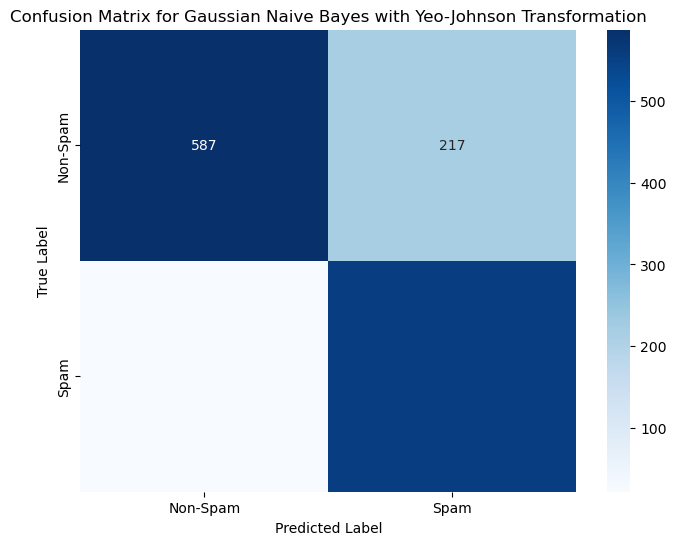


Classification Report for Gaussian Naive Bayes with Yeo-Johnson Transformation
              precision    recall  f1-score   support

           0       0.96      0.73      0.83       804
           1       0.72      0.96      0.82       577

    accuracy                           0.83      1381
   macro avg       0.84      0.85      0.83      1381
weighted avg       0.86      0.83      0.83      1381



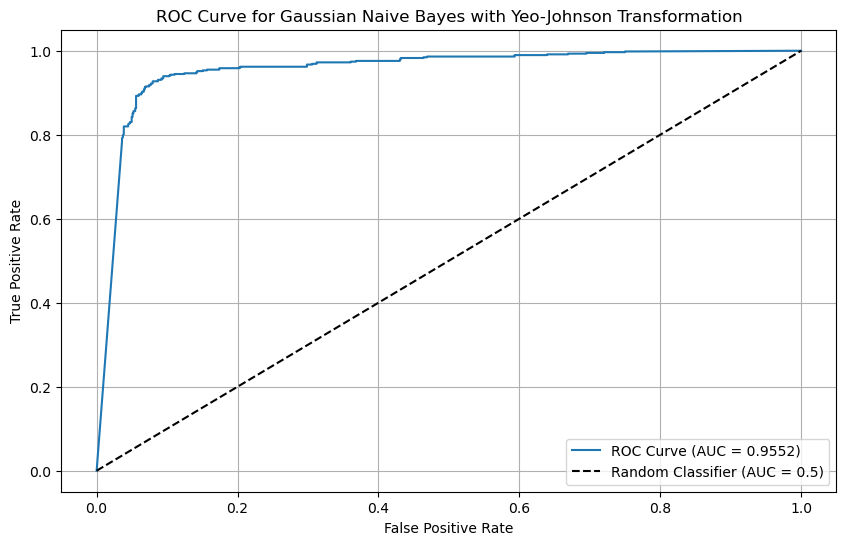

In [82]:
#Feature transformation 
# Calculate skewness for each feature
# Identify skewed features
skewness = X_train.skew().sort_values(ascending=False)
skewed_features = skewness[skewness > 0.75].index  # Adjust threshold as needed
print("\nSkewed Features:\n", skewed_features)

# Apply Yeo-Johnson transformation
transformer = PowerTransformer(method='yeo-johnson')
X_train[skewed_features] = transformer.fit_transform(X_train[skewed_features])
X_test[skewed_features] = transformer.transform(X_test[skewed_features])

# Train the Gaussian Naive Bayes model
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_gnb = gnb_model.predict(X_test)
y_prob_gnb = gnb_model.predict_proba(X_test)[:, 1]

# Evaluate the model using modular functions
metrics_gnb_transformed = evaluate_model(
    y_test, y_pred_gnb, y_prob_gnb,
    title="Gaussian Naive Bayes Evaluation with Yeo-Johnson Transformation"
)

# Visualize the confusion matrix
plot_confusion_matrix(
    y_test, y_pred_gnb, labels=['Non-Spam', 'Spam'],
    title="Confusion Matrix for Gaussian Naive Bayes with Yeo-Johnson Transformation"
)

# Print the classification report
print_classification_report(
    y_test, y_pred_gnb,
    title="Classification Report for Gaussian Naive Bayes with Yeo-Johnson Transformation"
)

# Plot the ROC curve
plot_roc_curve(
    y_test, y_prob_gnb, metrics_gnb_transformed['auc_score'],
    title="ROC Curve for Gaussian Naive Bayes with Yeo-Johnson Transformation"
)



Columns with Skewness Transformed:
 Index(['capital_run_length_longest', 'word_freq_parts', 'word_freq_3d',
       'capital_run_length_average', 'char_freq_%23', 'word_freq_table',
       'char_freq_%21', 'word_freq_conference', 'word_freq_credit',
       'word_freq_project', 'char_freq_%5B', 'word_freq_85', 'word_freq_money',
       'char_freq_%3B', 'char_freq_%28', 'word_freq_report', 'word_freq_cs',
       'word_freq_pm', 'word_freq_857', 'word_freq_lab', 'word_freq_415',
       'word_freq_internet', 'word_freq_address', 'word_freq_font',
       'word_freq_free', 'word_freq_direct', 'word_freq_mail',
       'word_freq_meeting', 'char_freq_%24', 'word_freq_telnet',
       'word_freq_re', 'word_freq_data', 'word_freq_technology',
       'word_freq_edu', 'word_freq_original', 'word_freq_addresses',
       'word_freq_labs', 'capital_run_length_total', 'word_freq_650',
       'word_freq_over', 'word_freq_remove', 'word_freq_business',
       'word_freq_people', 'word_freq_email', 'word_

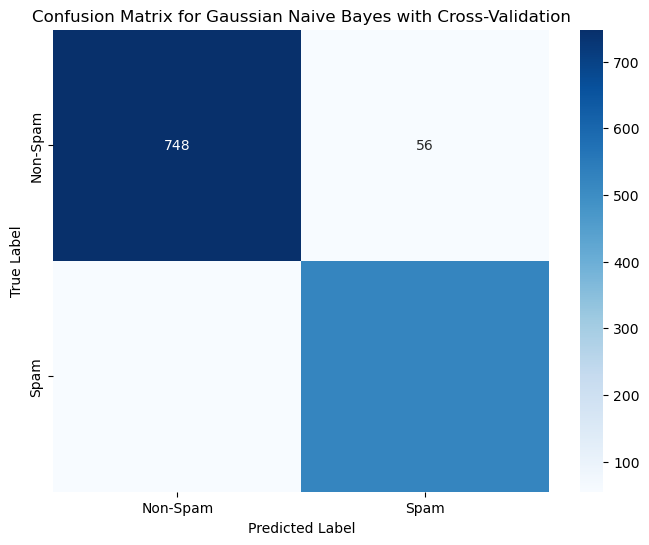


Classification Report for Gaussian Naive Bayes with Cross-Validation
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       804
           1       0.90      0.90      0.90       577

    accuracy                           0.92      1381
   macro avg       0.92      0.92      0.92      1381
weighted avg       0.92      0.92      0.92      1381



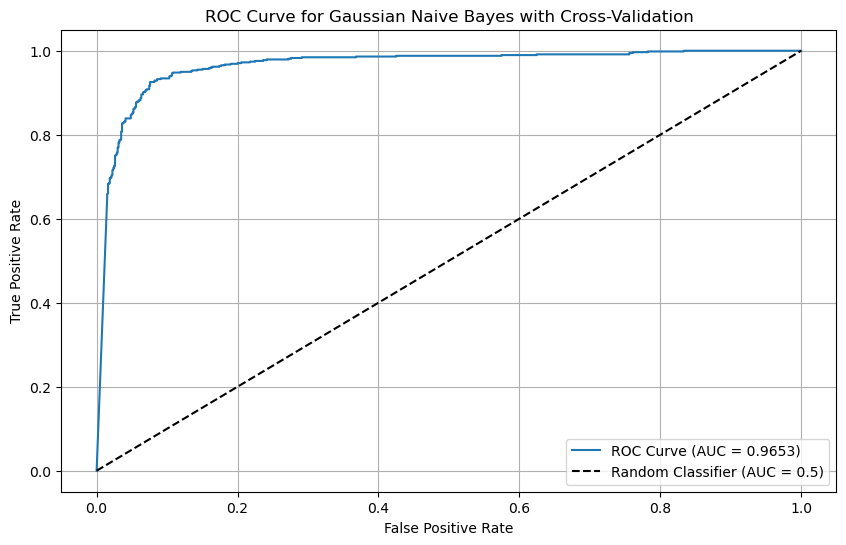


Best Parameters found by GridSearchCV:
{'var_smoothing': 1e-09}


In [29]:
#Retaining all the features and not removing
# Further tuning 
# Skewed feature selection and cross validation 
# Split data into training and testing sets
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identify skewed features and apply Yeo-Johnson transformation
def skewed_feature_transformation(train_data, test_data, skew_threshold=1.0):
    skewed_feats = train_data.skew().sort_values(ascending=False)
    skewed_columns = skewed_feats[abs(skewed_feats) > skew_threshold].index
    
    power_transformer = PowerTransformer(method='yeo-johnson')
    train_data[skewed_columns] = power_transformer.fit_transform(train_data[skewed_columns])
    test_data[skewed_columns] = power_transformer.transform(test_data[skewed_columns])
    
    return train_data, test_data, skewed_columns

X_train, X_test, skewed_columns = skewed_feature_transformation(X_train, X_test)
print("\nColumns with Skewness Transformed:\n", skewed_columns)

# Feature selection using SelectKBest
def feature_selection(X, y, num_features=20):  # Select top 20 features
    skb = SelectKBest(score_func=f_classif, k=num_features)
    X_new = skb.fit_transform(X, y)
    
    # Get feature names and their corresponding scores
    feature_indices = skb.get_support(indices=True)
    selected_features = X.columns[feature_indices]
    
    print("\nTop Selected Features and their ANOVA F-scores:")
    feature_scores = list(zip(selected_features, skb.scores_[feature_indices]))
    for feature, score in sorted(feature_scores, key=lambda x: x[1], reverse=True):
        print(f"{feature}: {score:.4f}")
    
    return X[selected_features]

selected_X_train = feature_selection(X_train, y_train)
selected_X_test = X_test[selected_X_train.columns]

# Apply robust scaling
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(selected_X_train)
X_test_scaled = scaler.transform(selected_X_test)

# Hyperparameter tuning with cross-validation for Gaussian Naive Bayes
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}
gnb_model = GaussianNB()
grid_search = GridSearchCV(gnb_model, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Best model after tuning
best_gnb_model = grid_search.best_estimator_

# Cross-validation scores
cv_scores = cross_val_score(best_gnb_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("\nCross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

# Make predictions and evaluate the model
y_pred_gnb = best_gnb_model.predict(X_test_scaled)
y_prob_gnb = best_gnb_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model using modular functions
metrics_gnb_tuned = evaluate_model(
    y_test, y_pred_gnb, y_prob_gnb,
    title="Gaussian Naive Bayes Evaluation with Cross-Validation and Feature Transformation"
)

# Visualize the confusion matrix
plot_confusion_matrix(
    y_test, y_pred_gnb, labels=['Non-Spam', 'Spam'],
    title="Confusion Matrix for Gaussian Naive Bayes with Cross-Validation"
)

# Print the classification report
print_classification_report(
    y_test, y_pred_gnb,
    title="Classification Report for Gaussian Naive Bayes with Cross-Validation"
)

# Plot the ROC curve
plot_roc_curve(
    y_test, y_prob_gnb, metrics_gnb_tuned['auc_score'],
    title="ROC Curve for Gaussian Naive Bayes with Cross-Validation"
)

# Display the best parameters found by GridSearchCV
print("\nBest Parameters found by GridSearchCV:")
print(grid_search.best_params_)

 
 




Best Threshold for Maximum F1 Score: 1.0000

Optimized Spam Detector Evaluation Metrics
Accuracy: 0.8277
Precision: 0.7460
Recall: 0.8908
F1 Score: 0.8120
AUC Score: 0.8924


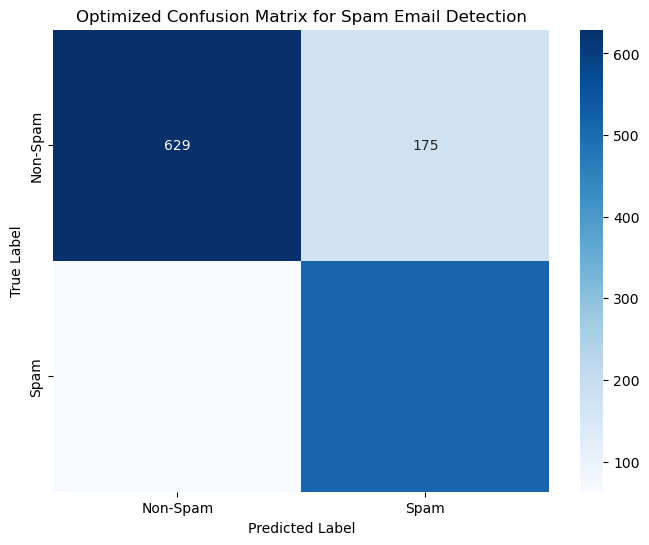


Optimized Classification Report for Spam Email Detection
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       804
           1       0.75      0.89      0.81       577

    accuracy                           0.83      1381
   macro avg       0.83      0.84      0.83      1381
weighted avg       0.84      0.83      0.83      1381



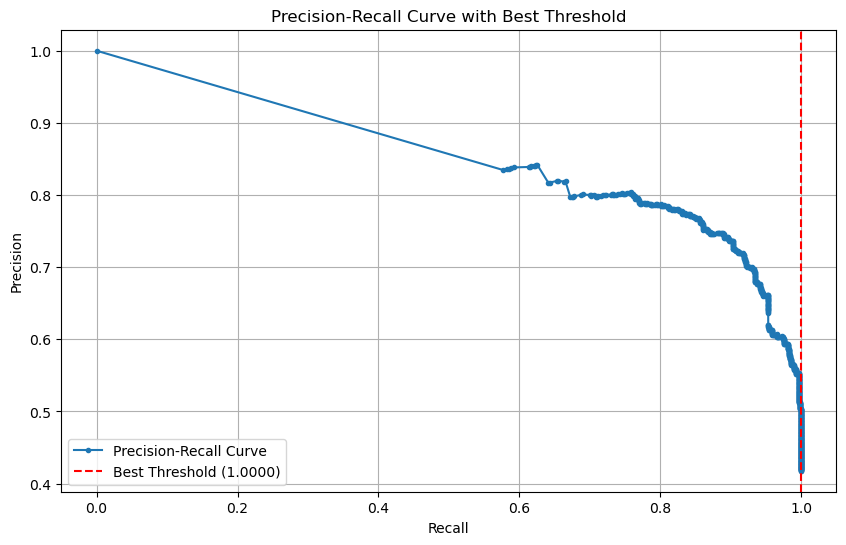

In [30]:
#Further tuning the model :Threshold turning
#maximize recall(true positive rate) and precision

# Test set predictions
y_prob = best_model.predict_proba(X_test)[:, 1]

# Precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Find the threshold that maximizes the F1 score
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"\nBest Threshold for Maximum F1 Score: {best_threshold:.4f}")

# Predictions using the optimized threshold
y_pred_optimized = (y_prob >= best_threshold).astype(int)

# Evaluate the optimized predictions using the modular function
metrics_optimized = evaluate_model(
    y_test, y_pred_optimized, y_prob,
    title="Optimized Spam Detector Evaluation Metrics"
)

# Visualize the optimized confusion matrix
plot_confusion_matrix(
    y_test, y_pred_optimized, labels=['Non-Spam', 'Spam'],
    title="Optimized Confusion Matrix for Spam Email Detection"
)

# Classification report for optimized predictions
print_classification_report(
    y_test, y_pred_optimized, title="Optimized Classification Report for Spam Email Detection"
)

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.axvline(x=best_threshold, color='r', linestyle='--', label=f'Best Threshold ({best_threshold:.4f})')
plt.title('Precision-Recall Curve with Best Threshold')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()



Spam Detector Evaluation Metrics
Accuracy: 0.8870
Precision: 0.8055
Recall: 0.9619
F1 Score: 0.8768
AUC Score: 0.9761


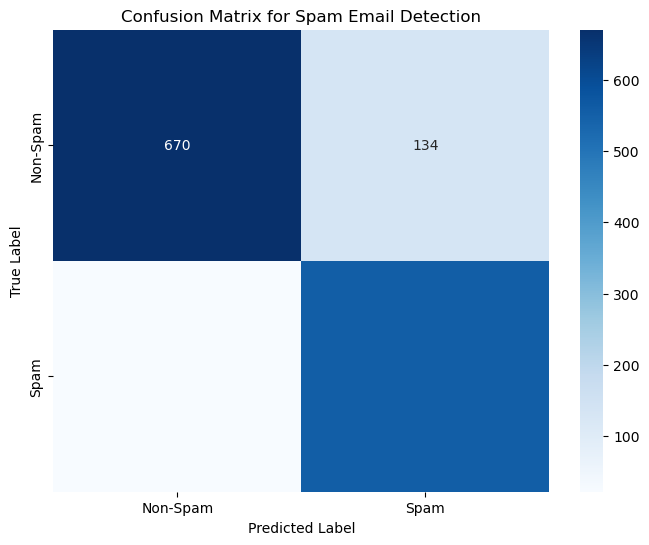


Classification Report for Spam Email Detection
              precision    recall  f1-score   support

           0       0.97      0.83      0.90       804
           1       0.81      0.96      0.88       577

    accuracy                           0.89      1381
   macro avg       0.89      0.90      0.89      1381
weighted avg       0.90      0.89      0.89      1381



In [31]:
# Normalize the data to [0, 1] before SMOTE
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Clip negative values (if any) to ensure compatibility
X_train_resampled = np.clip(X_train_resampled, a_min=0, a_max=None)
X_test_scaled = np.clip(X_test_scaled, a_min=0, a_max=None)

# Train the Multinomial Naive Bayes model
spam_detector = MultinomialNB()
spam_detector.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = spam_detector.predict(X_test_scaled)
y_prob = spam_detector.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
metrics = evaluate_model(
    y_test, y_pred, y_prob,
    title="Spam Detector Evaluation Metrics"
)

# Visualize the confusion matrix
plot_confusion_matrix(
    y_test, y_pred, labels=['Non-Spam', 'Spam'],
    title="Confusion Matrix for Spam Email Detection"
)

# Print the classification report
print_classification_report(
    y_test, y_pred,
    title="Classification Report for Spam Email Detection"
)


<a name="4"></a>
## 4 - Decision Tree model

### 4.1 Decision Tree model with unbalanced dataset.

In [64]:
# Train the Decision Tree model
dt_model = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced',  # Handle class imbalance
    max_depth=10,  # Prune the tree to prevent overfitting
    min_samples_split=10,  # Minimum number of samples to split a node
    min_samples_leaf=5  # Minimum number of samples at a leaf node
)

# Ensure the resampled data is a DataFrame with feature names
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Train the model with the DataFrame
dt_model.fit(X_train_resampled_df, y_train_resampled)

# Predictions and probabilities
y_pred_dt = dt_model.predict(X_test_df)
y_prob_dt = dt_model.predict_proba(X_test_df)[:, 1]  # Get the probability estimates for the positive class


#### Results for Decision Tree (unbalanced)

In [ ]:
# Evaluate the Decision Tree model using the modular functions
metrics_dt = evaluate_model(
    y_test, y_pred_dt, y_prob_dt,
    title="Decision Tree Evaluation Metrics"
)

# Visualize the confusion matrix for the Decision Tree
plot_confusion_matrix(
    y_test, y_pred_dt, labels=['Non-Spam', 'Spam'],
    title="Confusion Matrix for Decision Tree"
)

# Print the classification report
print_classification_report(
    y_test, y_pred_dt,
    title="Classification Report for Decision Tree"
)

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model, feature_names=X.columns, class_names=['Non-Spam', 'Spam'], filled=True, max_depth=3
)
plt.title('Visualization of Decision Tree (up to depth 3)')
plt.show()

# Feature importance analysis
importances = dt_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(
    feature_importance_df['Feature'].head(10),
    feature_importance_df['Importance'].head(10),
    color='skyblue'
)
plt.title('Top 10 Important Features in Decision Tree')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

# Class distribution analysis
print("Training set class distribution:")
print(y_train.value_counts())

print("\nTest set class distribution:")
print(y_test.value_counts())
print("\nPredicted class distribution:")
print(pd.Series(y_pred_dt).value_counts())

### 4.2 Decision Tree model with SMOTE balanced dataset.

In [65]:
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X.columns)
y_train_resampled_df = pd.Series(y_train_resampled)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

dt_model = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced',  # Optional, SMOTE already balances the data
    max_depth=10,  # Control overfitting
    min_samples_split=10,
    min_samples_leaf=5
)

dt_model.fit(X_train_resampled_df, y_train_resampled)

y_pred_dt = dt_model.predict(X_test_df)
y_prob_dt = dt_model.predict_proba(X_test_df)[:, 1]

#### Results for Decision Tree (SMOTE balanced)


Decision Tree Evaluation Metrics with SMOTE
Accuracy: 0.9160
Precision: 0.9276
Recall: 0.8666
F1 Score: 0.8961
AUC Score: 0.9427


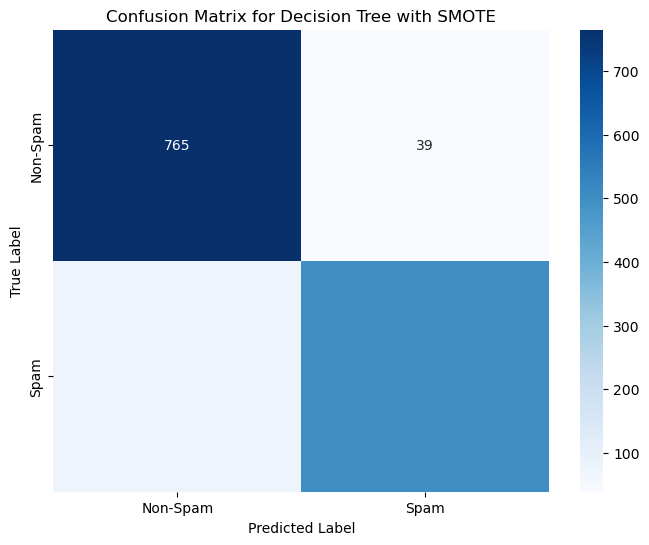

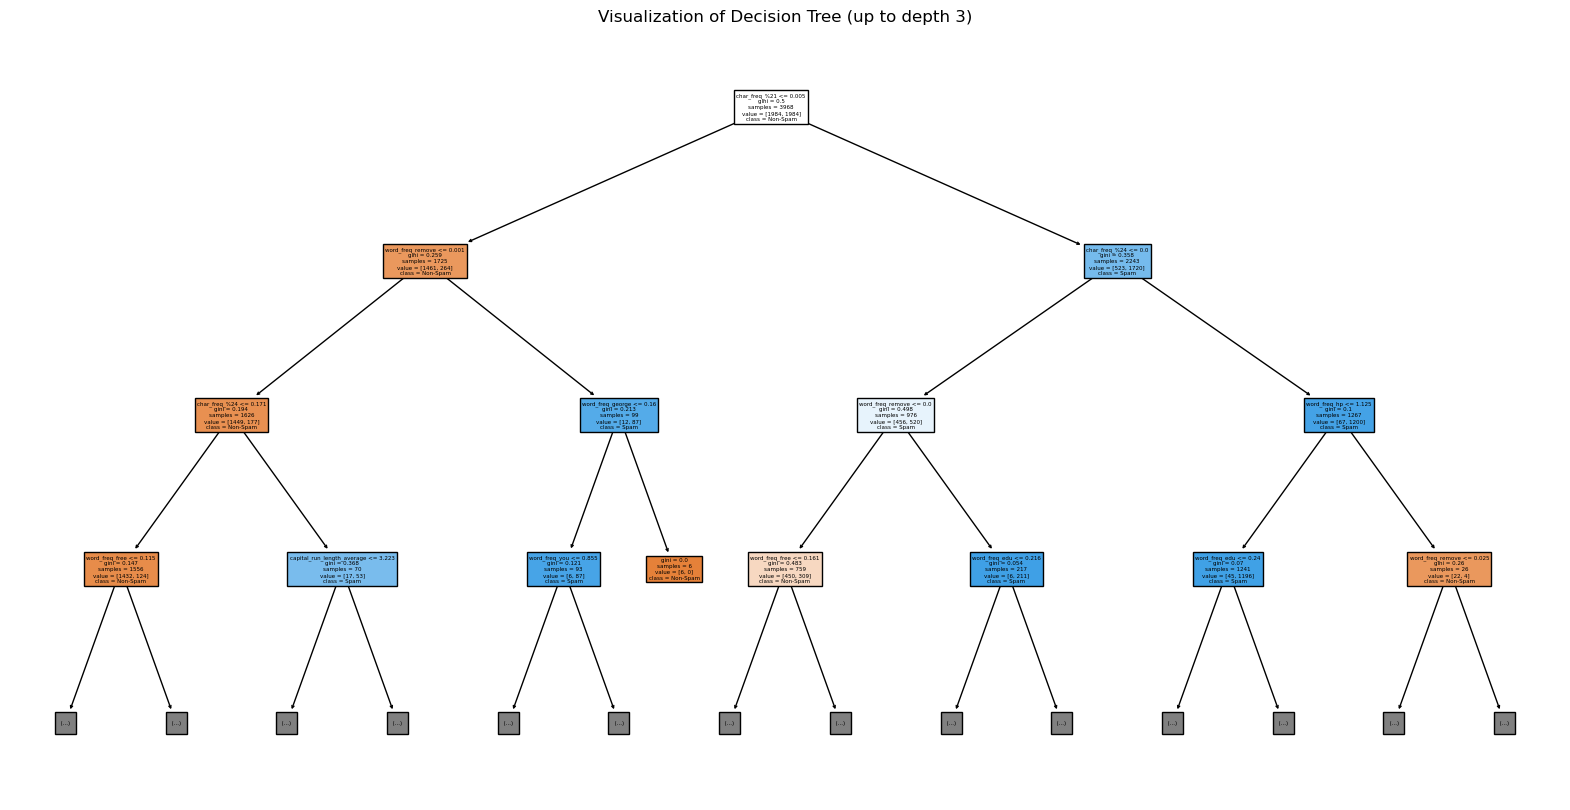


Classification Report for Decision Tree with SMOTE
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       804
           1       0.93      0.87      0.90       577

    accuracy                           0.92      1381
   macro avg       0.92      0.91      0.91      1381
weighted avg       0.92      0.92      0.92      1381



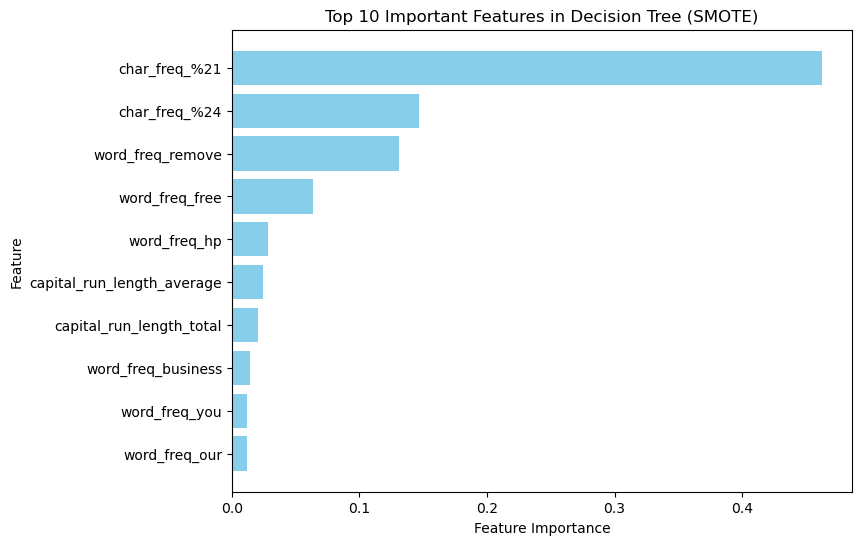

Training set class distribution after SMOTE:
class
1    1984
0    1984
Name: count, dtype: int64

Test set class distribution:
class
0    804
1    577
Name: count, dtype: int64

Predicted class distribution:
0    842
1    539
Name: count, dtype: int64


In [66]:
metrics_dt = evaluate_model(
    y_test, y_pred_dt, y_prob_dt,
    title="Decision Tree Evaluation Metrics with SMOTE"
)

plot_confusion_matrix(
    y_test, y_pred_dt, labels=['Non-Spam', 'Spam'],
    title="Confusion Matrix for Decision Tree with SMOTE"
)

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model, feature_names=X.columns, class_names=['Non-Spam', 'Spam'], filled=True, max_depth=3
)
plt.title('Visualization of Decision Tree (up to depth 3)')
plt.show()

print_classification_report(
    y_test, y_pred_dt,
    title="Classification Report for Decision Tree with SMOTE"
)

importances = dt_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
plt.barh(
    feature_importance_df['Feature'].head(10),
    feature_importance_df['Importance'].head(10),
    color='skyblue'
)
plt.title('Top 10 Important Features in Decision Tree (SMOTE)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

print("Training set class distribution after SMOTE:")
print(y_train_resampled.value_counts())

print("\nTest set class distribution:")
print(y_test.value_counts())

print("\nPredicted class distribution:")
print(pd.Series(y_pred_dt).value_counts())

<a name="5"></a>
## 5 - Logistic Regression

1. Overview
Logistic Regression is a supervised learning algorithm used for binary classification problems. It predicts the probability of an observation belonging to one of two classes using a logistic (sigmoid) function.

2. Steps
a. Dataset Preparation
Original dataset split into training and test sets.
Balanced training dataset using SMOTE to handle class imbalance.
b. Model Training
Performed gradient descent to optimize weights w and bias b.
Loss function used: Log-Loss (Cross-Entropy) with optional regularization.
c. Model Evaluation
Evaluated using metrics:
Accuracy
Confusion Matrix
d. Visualization
Plotted the decision boundary (only for 2D features).
Visualized the confusion matrix for both original and SMOTE-balanced datasets.
3. Results
Training Accuracy
Achieved accuracy of [insert value] on the training set.
Test Accuracy
Achieved accuracy of [insert value] on the test set.
Confusion Matrices
Original Dataset Confusion Matrix:
[Insert Confusion Matrix or Placeholder]
SMOTE Balanced Dataset Confusion Matrix:
[Insert Confusion Matrix or Placeholder]

### 5.1 Logistic Regression model with unbalanced dataset.

In [ ]:
Split data into training and test sets (70% train, 30% test)

X = data.drop(columns=['class'])  # Features
y = data['class']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("\nData Splits:")
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

In [ ]:
def sigmoid(z):

        # Compute sigmoid
    g = 1 / (1 + np.exp(-z))
        
    return g

In [ ]:
print ("sigmoid(0) = " + str(sigmoid(0)))

In [ ]:
def compute_cost(X, y, w, b, lambda_=None):
    """
    Compute the cost for logistic regression.

    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value 
      w : (array_like Shape (n,)) values of parameters of the model      
      b : scalar values of bias parameter of the model
      lambda_: unused placeholder
    Returns:
      total_cost: (scalar)         cost 
    """
    m, n = X.shape

    # Compute predictions
    z = np.dot(X, w) + b
    predictions = 1 / (1 + np.exp(-z))

    # Clip predictions to avoid log(0)
    epsilon = 1e-15
    predictions = np.clip(predictions, epsilon, 1 - epsilon)

    # Compute cost
    cost = -1 / m * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))

    return cost


In [ ]:
m, n = X_train.shape

# Compute and display cost with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train, y_train, initial_w, initial_b)
print('Cost at initial w (zeros): {:.3f}'.format(cost))

In [ ]:
import numpy as np

# UNQ_C3
# GRADED FUNCTION: compute_gradient
def compute_gradient(X, y, w, b, lambda_=None): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X : (ndarray Shape (m,n)) variable such as house size 
      y : (array_like Shape (m,)) actual value 
      w : (array_like Shape (n,)) values of parameters of the model      
      b : (scalar)                 value of parameter of the model 
      lambda_: unused placeholder.
    Returns
      dj_dw: (array_like Shape (n,)) The gradient of the cost w.r.t. the parameters w. 
      dj_db: (scalar)                The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    # Compute predictions
    z = np.dot(X, w) + b
    predictions = 1 / (1 + np.exp(-z))

    # Compute gradients
    error = predictions - y  # Residual error
    dj_dw = (1 / m) * np.dot(X.T, error)
    dj_db = (1 / m) * np.sum(error)
        
    return dj_db, dj_dw


In [ ]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (array_like Shape (m, n))
      y :    (array_like Shape (m,))
      w_in : (array_like Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)                 Initial value of parameter of the model
      cost_function:                  Function to compute cost
      gradient_function:              Function to compute gradients
      alpha : (float)                 Learning rate
      num_iters : (int)               Number of iterations to run gradient descent
      lambda_: (scalar, float)        Regularization constant (optional, not used here)
      
    Returns:
      w : (array_like Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
      J_history: (list)           Cost value at each iteration
      w_history: (list)           Weight values at each iteration (primarily for graphing)
    """
    # Number of training examples
    m = len(X)
    
    # Arrays to store cost history and weights at each iteration
    J_history = []
    w_history = []
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update parameters using gradient and learning rate
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
        
        # Save cost at each iteration for visualization
        cost = cost_function(X, y, w_in, b_in, lambda_)
        J_history.append(cost)

        # Save weights for potential graphing/debugging
        w_history.append(w_in.copy())

        # Print progress every 10% of the total iterations or at the last iteration
        if i % math.ceil(num_iters / 10) == 0 or i == (num_iters - 1):
            print(f"Iteration {i:4}: Cost {float(cost):8.6f}")
        
    return w_in, b_in, J_history, w_history


In [ ]:
np.random.seed(1)
intial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
initial_b = -8


# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

In [ ]:

import numpy as np

# GRADED FUNCTION: predict
def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    
    Args:
    X : (ndarray Shape (m, n))        Data matrix of m examples and n features
    w : (array_like Shape (n,))      Parameters of the model
    b : (scalar, float)              Parameter of the model (bias)

    Returns:
    p: (ndarray (m,))                Predictions (0 or 1) for each example
    """
    # Compute the linear combination of features and weights
    z = np.dot(X, w) + b
    
    # Apply the sigmoid function to compute probabilities
    probabilities = 1 / (1 + np.exp(-z))
    
    # Apply the threshold of 0.5 to classify into 0 or 1
    p = probabilities >= 0.5
    p = p.astype(int)  # Convert boolean to integers (0 or 1)
    
    return p

In [ ]:
#Compute accuracy on our training set
p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))


#### Results for Logistic Regression (unbalanced)

In [ ]:
# Compute predictions for the test set using your custom predict function
y_test_pred = predict(X_test, w, b)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Create and plot the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Spam", "Spam"])
disp.plot(cmap=plt.cm.Blues)

# Add titles and labels for clarity
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


### 5.2 Logistic Regression model with SMOTE dataset.

In [ ]:
# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# UNQ_C1
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """

        # Compute sigmoid
    g = 1 / (1 + np.exp(-z))
        
    
    return g

In [ ]:
print ("sigmoid(0) = " + str(sigmoid(0)))

In [ ]:
def compute_cost(X, y, w, b, lambda_=None):
    """
    Compute the cost for logistic regression.

    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value 
      w : (array_like Shape (n,)) values of parameters of the model      
      b : scalar values of bias parameter of the model
      lambda_: unused placeholder
    Returns:
      total_cost: (scalar)         cost 
    """
    m, n = X.shape

    # Compute predictions
    z = np.dot(X, w) + b
    predictions = 1 / (1 + np.exp(-z))

    # Clip predictions to avoid log(0)
    epsilon = 1e-15
    predictions = np.clip(predictions, epsilon, 1 - epsilon)

    # Compute cost
    cost = -1 / m * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))

    return cost


In [ ]:
m, n = X_train.shape

# Compute and display cost with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train_resampled, y_train_resampled, initial_w, initial_b)
print('Cost at initial w (zeros): {:.3f}'.format(cost))

In [ ]:
# UNQ_C3
# GRADED FUNCTION: compute_gradient
def compute_gradient(X, y, w, b, lambda_=None): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X : (ndarray Shape (m,n)) variable such as house size 
      y : (array_like Shape (m,)) actual value 
      w : (array_like Shape (n,)) values of parameters of the model      
      b : (scalar)                 value of parameter of the model 
      lambda_: unused placeholder.
    Returns
      dj_dw: (array_like Shape (n,)) The gradient of the cost w.r.t. the parameters w. 
      dj_db: (scalar)                The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    # Compute predictions
    z = np.dot(X, w) + b
    predictions = 1 / (1 + np.exp(-z))

    # Compute gradients
    error = predictions - y  # Residual error
    dj_dw = (1 / m) * np.dot(X.T, error)
    dj_db = (1 / m) * np.sum(error)
        
    return dj_db, dj_dw


In [ ]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (array_like Shape (m, n))
      y :    (array_like Shape (m,))
      w_in : (array_like Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)                 Initial value of parameter of the model
      cost_function:                  Function to compute cost
      gradient_function:              Function to compute gradients
      alpha : (float)                 Learning rate
      num_iters : (int)               Number of iterations to run gradient descent
      lambda_: (scalar, float)        Regularization constant (optional, not used here)
      
    Returns:
      w : (array_like Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
      J_history: (list)           Cost value at each iteration
      w_history: (list)           Weight values at each iteration (primarily for graphing)
    """
    # Number of training examples
    m = len(X)
    
    # Arrays to store cost history and weights at each iteration
    J_history = []
    w_history = []
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update parameters using gradient and learning rate
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
        
        # Save cost at each iteration for visualization
        cost = cost_function(X, y, w_in, b_in, lambda_)
        J_history.append(cost)

        # Save weights for potential graphing/debugging
        w_history.append(w_in.copy())

        # Print progress every 10% of the total iterations or at the last iteration
        if i % math.ceil(num_iters / 10) == 0 or i == (num_iters - 1):
            print(f"Iteration {i:4}: Cost {float(cost):8.6f}")
        
    return w_in, b_in, J_history, w_history


In [ ]:
np.random.seed(1)
intial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
initial_b = -8


# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train_resampled ,y_train_resampled, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

In [ ]:

import numpy as np

# GRADED FUNCTION: predict
def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    
    Args:
    X : (ndarray Shape (m, n))        Data matrix of m examples and n features
    w : (array_like Shape (n,))      Parameters of the model
    b : (scalar, float)              Parameter of the model (bias)

    Returns:
    p: (ndarray (m,))                Predictions (0 or 1) for each example
    """
    # Compute the linear combination of features and weights
    z = np.dot(X, w) + b
    
    # Apply the sigmoid function to compute probabilities
    probabilities = 1 / (1 + np.exp(-z))
    
    # Apply the threshold of 0.5 to classify into 0 or 1
    p = probabilities >= 0.5
    p = p.astype(int)  # Convert boolean to integers (0 or 1)
    
    return p

In [ ]:
#Compute accuracy on our training set
p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))


#### Results for Logistic Regression (SMOTE balanced)

In [ ]:
# Ensure predictions are computed on the original test set
y_test_pred_smote = predict(X_test, w, b)

# Compute the confusion matrix for SMOTE-balanced model predictions
cm_smote = confusion_matrix(y_test, y_test_pred_smote)

# Create and plot the confusion matrix for SMOTE
disp_smote = ConfusionMatrixDisplay(confusion_matrix=cm_smote, display_labels=["Non-Spam", "Spam"])
disp_smote.plot(cmap=plt.cm.Blues)

# Add titles and labels for clarity
plt.title("Confusion Matrix - Logistic Regression (SMOTE Balanced)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
